In [4]:
from IPython.display import display
import urllib3
import xml.etree.ElementTree as ET
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#TODO Remember to save out your dataframes to a data folder in case things change on website. Do this for the other one too!

In [6]:
def fetchWebpage(dataurl):
    #Get webpage html data
    http = urllib3.PoolManager()
    res = http.request('GET', dataurl)
    rawhtml = res.data.decode('utf-8')
    return rawhtml;

In [7]:
url = "http://amphibiaweb.org/cgi/amphib_ws_locality?orderbyaw=Order&rel-isocc=eq&where-isocc=MG"
dat = fetchWebpage(url)
tree = ET.fromstring(dat)

In [13]:
amphibArray = []
for species in tree.getchildren():
    amphibArray.append({attr.tag: attr.text for attr in species})
df = pd.DataFrame(amphibArray)
df = df.drop_duplicates("scientificname")

In [14]:
iucnrawdata = pd.read_table("amphibdat.txt")
mergedf = pd.merge(df, iucnrawdata, how="left", left_on="scientificname", right_on="gaa_name")
mergedf.head()
mergedf.to_csv("data/amphibians.csv")
familyct = pd.DataFrame(df["family"].value_counts());
totalct = len(df.index)
orderct = pd.DataFrame(df["order"].value_counts())
genusct = pd.DataFrame(mergedf["genus"].value_counts())
print("Counts of Species Taxanomic Orders:")
display(orderct)
print("Counts of Species Taxanomic Families:")
display(familyct)
print("Counts of Top 5 Species Taxanomic Genuses:")
display(genusct.head())

Counts of Species Taxanomic Orders:


,0
Anura,305


Counts of Species Taxanomic Families:


,0
Mantellidae,210
Microhylidae,84
Hyperoliidae,11


Counts of Top 5 Species Taxanomic Genuses:


,0
Boophis,55
Gephyromantis,34
Mantidactylus,30
Mantella,16
Heterixalus,11


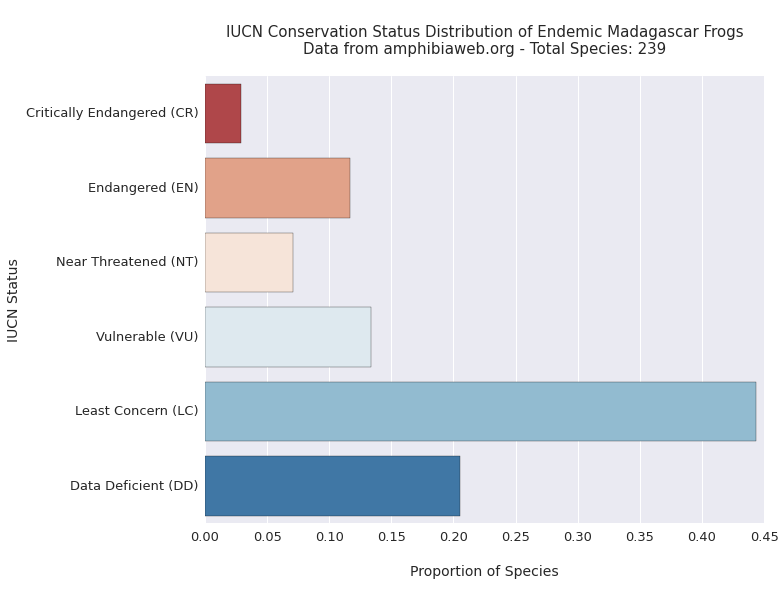

In [30]:
#iucnorder = ["Not Recorded","Data Deficient (DD)", "Least Concern (LC)", "Vulnerable (VU)", "Near Threatened (NT)", "Endangered (EN)", "Critically Endangered (CR)"]
iucnorder = ["Data Deficient (DD)", "Least Concern (LC)", "Vulnerable (VU)", "Near Threatened (NT)", "Endangered (EN)", "Critically Endangered (CR)"]
#plotdat = pd.DataFrame(mergedf["iucn"].fillna("Not Recorded").value_counts())
plotdat = pd.DataFrame(mergedf["iucn"].dropna().value_counts())
iucnct = sum(plotdat[0]);
plt.figure(figsize=(11, 8.5))
sns.barplot(y=plotdat.index, x=plotdat[0]/iucnct, order=reversed(iucnorder), palette="RdBu")
plt.title("\nIUCN Conservation Status Distribution of Endemic Madagascar Frogs\nData from amphibiaweb.org - Total Species: "+str(iucnct)+"\n", fontsize=15)
plt.xlabel("\nProportion of Species\n", fontsize=14)
plt.ylabel("IUCN Status", fontsize=14)
plt.tick_params(labelsize=13)
plt.tight_layout()
plt.savefig("figures/amphibIUCN.png")

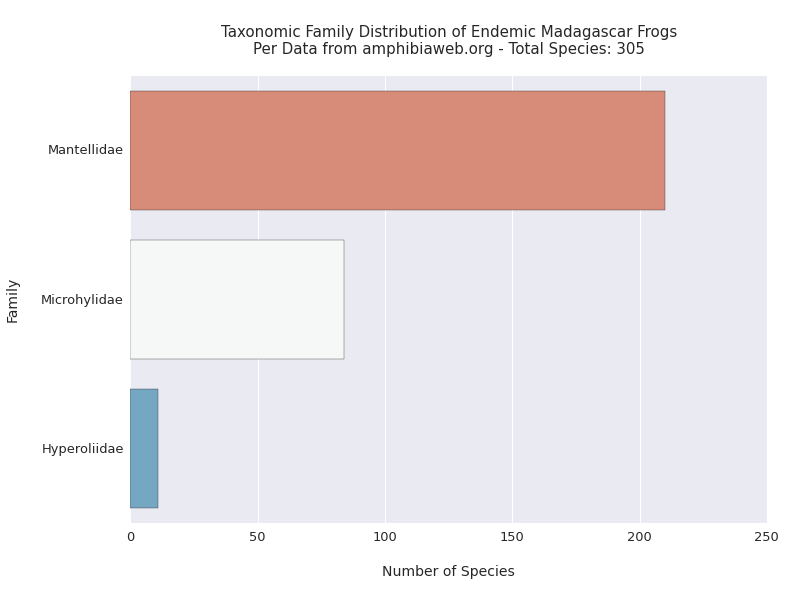

In [25]:
plt.figure(figsize=(11, 8.5))
sns.barplot(y=familyct.index, x=familyct[0], palette="RdBu")
plt.title("\nTaxonomic Family Distribution of Endemic Madagascar Frogs\nPer Data from amphibiaweb.org - Total Species: "+str(totalct)+"\n", fontsize=15)
plt.xlabel("\nNumber of Species\n", fontsize=14)
plt.ylabel("Family\n", fontsize=14)
plt.tick_params(labelsize=13)
plt.tight_layout()
plt.savefig("figures/amphibFamily.png")